In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
flood_comm_df = pd.read_csv('311_data/flood_calls_311_comm.csv')
flood_comm_df.head()

,Created Date,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
0,2000-01-01,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2000-01-03,0,0,0,4,1,4,1,1,1,...,1,0,0,0,0,0,2,1,2,2
3,2000-01-04,0,0,0,0,1,4,1,0,0,...,3,0,0,1,0,0,0,0,1,1
4,2000-01-05,0,0,0,1,1,3,0,0,0,...,1,0,1,1,0,0,1,0,1,1


In [3]:
flood_comm_df['Created Date'] = pd.to_datetime(flood_comm_df['Created Date'])
flood_comm_df = flood_comm_df.set_index(pd.DatetimeIndex(flood_comm_df['Created Date']))
flood_comm_df = flood_comm_df[flood_comm_df.columns.values[1:]]
flood_comm_df.head()

,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,BEVERLY,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
2000-01-01,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-02,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2000-01-03,0,0,0,4,1,4,1,1,1,0,...,1,0,0,0,0,0,2,1,2,2
2000-01-04,0,0,0,0,1,4,1,0,0,0,...,3,0,0,1,0,0,0,0,1,1
2000-01-05,0,0,0,1,1,3,0,0,0,1,...,1,0,1,1,0,0,1,0,1,1


In [4]:
flood_comm_stack = flood_comm_df.stack()
flood_comm_stack.head()

2000-01-01  ALBANY PARK       0
            ARCHER HEIGHTS    0
            ARMOUR SQUARE     0
            ASHBURN           0
            AUBURN GRESHAM    0
dtype: int64

In [5]:
flood_comm_stack_df = pd.DataFrame(flood_comm_stack).reset_index()
flood_comm_stack_df.head()

,level_0,level_1,0
0,2000-01-01,ALBANY PARK,0
1,2000-01-01,ARCHER HEIGHTS,0
2,2000-01-01,ARMOUR SQUARE,0
3,2000-01-01,ASHBURN,0
4,2000-01-01,AUBURN GRESHAM,0


In [6]:
flood_comm_stack_df = flood_comm_stack_df.rename(columns={'level_0':'Date','level_1':'Community Area',0:'Count Calls'})
flood_comm_totals = flood_comm_stack_df.groupby(['Community Area'])['Count Calls'].sum()
flood_comm_totals.head()

Community Area
ALBANY PARK       4632
ARCHER HEIGHTS    1288
ARMOUR SQUARE      488
ASHBURN           6955
AUBURN GRESHAM    9186
Name: Count Calls, dtype: int64

In [7]:
flood_comm_sum = flood_comm_totals.reset_index()
flood_comm_sum.head()

,Community Area,Count Calls
0,ALBANY PARK,4632
1,ARCHER HEIGHTS,1288
2,ARMOUR SQUARE,488
3,ASHBURN,6955
4,AUBURN GRESHAM,9186


## Total Calls by Community Area

In the [WBEZ article and CNT analysis](http://www.heatofthemoment.org/features/flood/) of neighborhood flooding, they used zip code as the primary identifier of geography. While the relied on additional data sources, 311 calls seemed to factor into their analysis. Totaling all of the water in street and basement 311 calls by community area gives Austin as the top area by a significant margin, and it's worth noting that Austin is essentially split into three zip codes, which may have resulted in it not seeming to have as much flooding activity as it does in reality.

Will look at zip code to see if the numbers are similar to WBEZ's for 2009-2015 by zip code

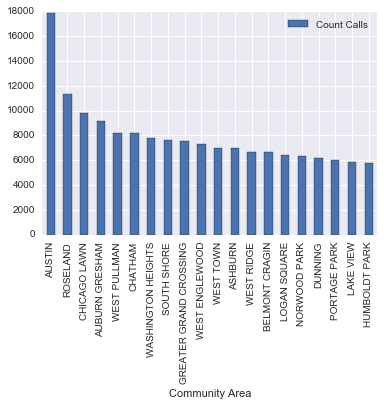

In [8]:
flood_comm_top = flood_comm_sum.sort_values(by='Count Calls', ascending=False)[:20]
flood_comm_top.plot(kind='bar',x='Community Area',y='Count Calls')

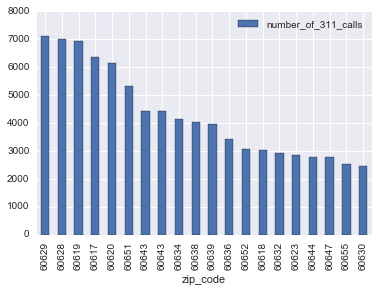

In [9]:
# WBEZ zip data
wbez_zip = pd.read_csv('wbez_flood_311_zip.csv')
wbez_zip_top = wbez_zip.sort_values(by='number_of_311_calls',ascending=False)[:20]
wbez_zip_top.plot(kind='bar',x='zip_code',y='number_of_311_calls')

In [12]:
flood_zip_df = pd.read_csv('311_data/flood_calls_311_zip.csv')
flood_zip_df['Created Date'] = pd.to_datetime(flood_zip_df['Created Date'])
flood_zip_df = flood_zip_df.set_index(pd.DatetimeIndex(flood_zip_df['Created Date']))
# Setting to same time frame as WBEZ
flood_zip_df = flood_zip_df['2009-01-01':'2015-12-30']
flood_zip_df = flood_zip_df[flood_zip_df.columns.values[1:]]
flood_zip_stack = pd.DataFrame(flood_zip_df.stack()).reset_index()
flood_zip_stack = flood_zip_stack.rename(columns={'level_0':'Created Date','level_1':'Zip Code',0:'Count Calls'})
flood_zip_sum = flood_zip_stack.groupby(['Zip Code'])['Count Calls'].sum()
flood_zip_sum = flood_zip_sum.reset_index()
flood_zip_sum.head()

,Zip Code,Count Calls
0,60601,68
1,60602,42
2,60603,54
3,60604,89
4,60605,158


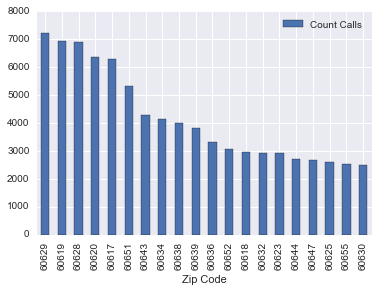

In [13]:
flood_zip_top = flood_zip_sum.sort_values(by='Count Calls', ascending=False)[:20]
flood_zip_top.plot(kind='bar',x='Zip Code',y='Count Calls')

## Zip Code Data Comparison - WBEZ, Current Data

To make sure that the data is at least similar, plotting out both next to each other, and they seem to match up overall with some slight differences. Given that it relatively ensures we're working with the same data, we can plot out the same patterns by neighborhood and see if Austin is still overlooked (given that it is in the zip code breakdown)

Data mostly matches up, can see it on map on [Gross Gatherings article](http://www.heatofthemoment.org/features/flood/)

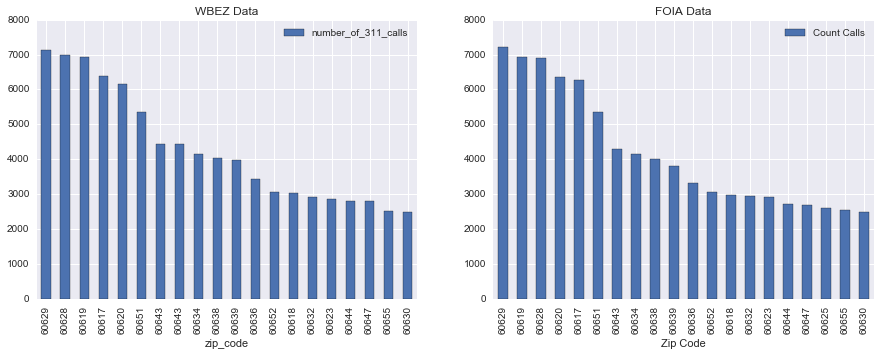

In [16]:
fig, axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15, 5]
wbez_zip_top.plot(title='WBEZ Data', ax=axs[0], kind='bar',x='zip_code',y='number_of_311_calls')
flood_zip_top.plot(title='FOIA Data', ax=axs[1], kind='bar',x='Zip Code',y='Count Calls')

In [17]:
flood_comm_time = flood_comm_stack_df.copy()
flood_comm_time['Date'] = pd.to_datetime(flood_comm_time['Date'])
flood_comm_time = flood_comm_time.set_index(pd.DatetimeIndex(flood_comm_time['Date']))
flood_comm_time = flood_comm_time['2009-01-01':'2015-12-30']
flood_comm_time_sum = flood_comm_time.groupby(['Community Area'])['Count Calls'].sum()
flood_comm_time_sum = flood_comm_time_sum.reset_index()
flood_comm_time_sum.head()

,Community Area,Count Calls
0,ALBANY PARK,1561
1,ARCHER HEIGHTS,556
2,ARMOUR SQUARE,191
3,ASHBURN,3139
4,AUBURN GRESHAM,3688


## Community Area Breakdown for 2009-2015

Looking at the period WBEZ reviewed calls for, it's clear that zip codes are missing a large part of the picture. In reality, Austin is far and away the community area with the most floods, not necessarily Chatham. While many areas seem to have significant problems with flooding, using zip codes as a proxy for neighborhoods in this case loses some of the concentration.

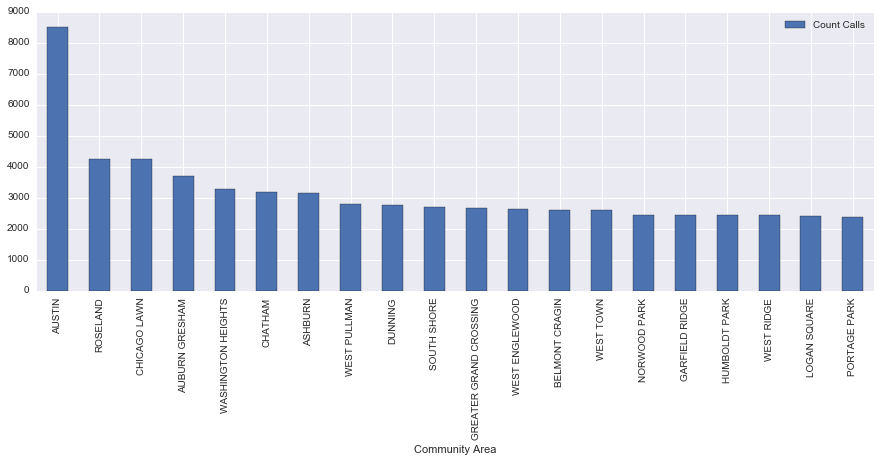

In [18]:
flood_comm_time_top = flood_comm_time_sum.sort_values(by='Count Calls', ascending=False)[:20]
flood_comm_time_top.plot(kind='bar',x='Community Area',y='Count Calls')